In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import metrics
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

%load_ext tensorboard

In [2]:
from tensorflow import keras
print(tf.__version__)


2.13.1


In [3]:
import os
from os.path import isfile, join
import re


mypath = 'dataset_42028assg1_13918471'
categories = ['!', ')', '[', '+', '=', 'cos', 'div', 'sum', 'tan', 'times']
dataset = []
img_index_arr = []
# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

def load_data():
    for category in categories:
        path = os.path.join(mypath, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),0)
                new_array = cv2.resize(img_array, (28,28))
                dataset.append(new_array)
                img_index_arr.append(class_num)
            except Exception as e:
                print(e)


In [4]:
load_data()

!
)
+
sum


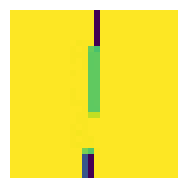

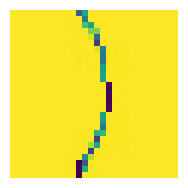

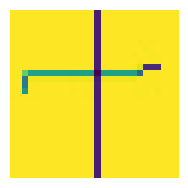

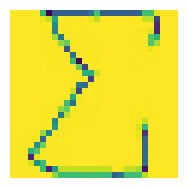

In [5]:
datasetArr = np.array(dataset)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(dataset[0])
print(categories[img_index_arr[0]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,2)
ax1.axis('off')
ax1.imshow(dataset[500])
print(categories[img_index_arr[500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,3)
ax1.axis('off')
ax1.imshow(dataset[1500])
print(categories[img_index_arr[1500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,4)
ax1.axis('off')
ax1.imshow(dataset[3500])
print(categories[img_index_arr[3500]])


In [23]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius

	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))

		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		# return the histogram of Local Binary Patterns
		return hist

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(datasetArr, img_index_arr) 


In [25]:
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
	# load the image, convert it to grayscale, and extract LBP features
	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)

	# extract the label from the image path, then update the
	# label and data lists
	labels_train.append(Y_train[img_index])
	data_train.append(hist)

In [26]:
print(np.shape(X_train))


(3750, 28, 28)


In [27]:
X_val = np.array(X_train[:500] /255.0)
Y_val = np.array(Y_train[:500]) 

X_train = np.array(X_train [500:] /255.0)
Y_train = np.array(Y_train [500:])

X_test = np.array(X_test /255.0)
Y_test = np.array(Y_test)

print(X_train[4])


[[1.         1.         1.         1.         1.         1.
  1.         0.99607843 1.         0.99607843 1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         0.99607843
  1.         0.99607843 1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         0.99607843
  0.99215686 1.         0.99607843 0.99215686 1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         0.99607843
  1.         0.94117647 1.         0.99607843 1.       

In [28]:
# plt.imshow(data_train[0])

print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(3250, 28, 28)
(500, 28, 28)
(1250, 28, 28)


In [29]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#Visualize Network Model
modelViz_file= 'model_1.png' # Model filename

# Plot model
keras.utils.plot_model(model, to_file=modelViz_file, show_shapes=True)

In [30]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(X_train, Y_train, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
102/102 [==============================] - 1s 4ms/step - loss: 2.2614 - accuracy: 0.1985 - val_loss: 1.9611 - val_accuracy: 0.2740
Epoch 2/10
102/102 [==============================] - 0s 2ms/step - loss: 1.8212 - accuracy: 0.4394 - val_loss: 1.6472 - val_accuracy: 0.5160
Epoch 3/10
102/102 [==============================] - 0s 2ms/step - loss: 1.4957 - accuracy: 0.6018 - val_loss: 1.2924 - val_accuracy: 0.7280
Epoch 4/10
102/102 [==============================] - 0s 2ms/step - loss: 1.2351 - accuracy: 0.6738 - val_loss: 1.1751 - val_accuracy: 0.6760
Epoch 5/10
102/102 [==============================] - 0s 3ms/step - loss: 1.0504 - accuracy: 0.7326 - val_loss: 1.0999 - val_accuracy: 0.6880
Epoch 6/10
102/102 [==============================] - 0s 3ms/step - loss: 0.8884 - accuracy: 0.7975 - val_loss: 0.8464 - val_accuracy: 0.8100
Epoch 7/10
102/102 [==============================] - 0s 3ms/step - loss: 0.7993 - accuracy: 0.7982 - val_loss: 0.7399 - val_accuracy: 0.8440
Epoch 

In [31]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(X_train, Y_train, epochs=10,validation_data=(X_val, Y_val))


Epoch 1/10
102/102 [==============================] - 1s 3ms/step - loss: 2.2510 - accuracy: 0.1729 - val_loss: 2.2151 - val_accuracy: 0.1500
Epoch 2/10
102/102 [==============================] - 0s 2ms/step - loss: 2.0477 - accuracy: 0.2929 - val_loss: 1.9430 - val_accuracy: 0.3240
Epoch 3/10
102/102 [==============================] - 0s 2ms/step - loss: 1.8805 - accuracy: 0.3985 - val_loss: 1.8472 - val_accuracy: 0.4060
Epoch 4/10
102/102 [==============================] - 0s 4ms/step - loss: 1.7195 - accuracy: 0.4822 - val_loss: 1.6747 - val_accuracy: 0.4940
Epoch 5/10
102/102 [==============================] - 0s 2ms/step - loss: 1.5362 - accuracy: 0.5465 - val_loss: 1.4743 - val_accuracy: 0.5860
Epoch 6/10
102/102 [==============================] - 0s 2ms/step - loss: 1.3962 - accuracy: 0.6178 - val_loss: 1.3163 - val_accuracy: 0.6800
Epoch 7/10
102/102 [==============================] - 0s 2ms/step - loss: 1.2692 - accuracy: 0.6545 - val_loss: 1.2321 - val_accuracy: 0.6440
Epoch 

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


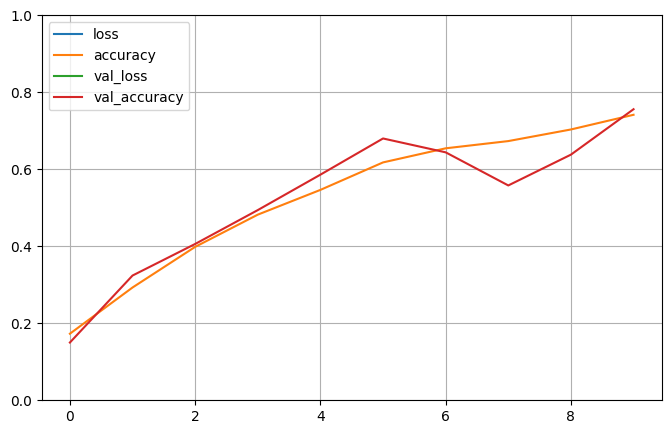

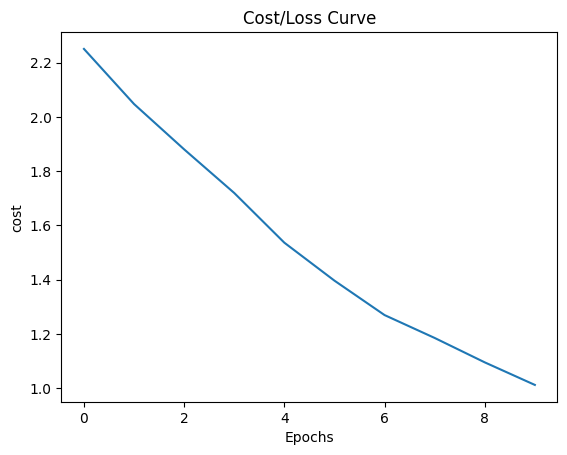

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [34]:
model.evaluate(X_test, Y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.8216


[0.6520848274230957, 0.8216000199317932]